In [ ]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import cv2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
caminho_zip = "/content/drive/MyDrive/ML2_Cacau/Image Datasets of Cocoa Beans for Taxonomy Nuances Evaluation.zip"
destino = "/content/drive/MyDrive/ML2_Cacau/data"

os.makedirs(destino, exist_ok=True)

with zipfile.ZipFile(caminho_zip, 'r') as zip_ref:
    arquivos = zip_ref.namelist()
    print(f"Total de arquivos no ZIP: {len(arquivos)}")

    for arquivo in arquivos:
        if arquivo.lower().endswith(('.jpg', '.png')):
            zip_ref.extract(arquivo, destino)



Total de arquivos no ZIP: 8


In [ ]:
base_dir = "/content/drive/MyDrive/ML2_Cacau/data/version3_method_b/Enquadrado e Centralizado - Versão 3 - Método B"

In [ ]:
classes = sorted([
    d for d in os.listdir(base_dir)
    if os.path.isdir(os.path.join(base_dir, d))
])

print("Classes encontradas:")
for c in classes:
    print("- ", c)

Classes encontradas:
-  Agglutinated
-  Brittle
-  Compartmentalized_Brown
-  Compartmentalized_PartiallyPurple
-  Compartmentalized_Purple
-  Compartmentalized_Slaty
-  Compartmentalized_White
-  Flattened
-  Moldered
-  Plated_Brown
-  Plated_PartiallyPurple
-  Plated_Purple
-  Plated_Slaty
-  Plated_White


Agglutinated: 100 imagens
Brittle: 100 imagens
Compartmentalized_Brown: 100 imagens
Compartmentalized_PartiallyPurple: 100 imagens
Compartmentalized_Purple: 100 imagens
Compartmentalized_Slaty: 100 imagens
Compartmentalized_White: 100 imagens
Flattened: 100 imagens
Moldered: 100 imagens
Plated_Brown: 100 imagens
Plated_PartiallyPurple: 100 imagens
Plated_Purple: 100 imagens
Plated_Slaty: 100 imagens
Plated_White: 100 imagens


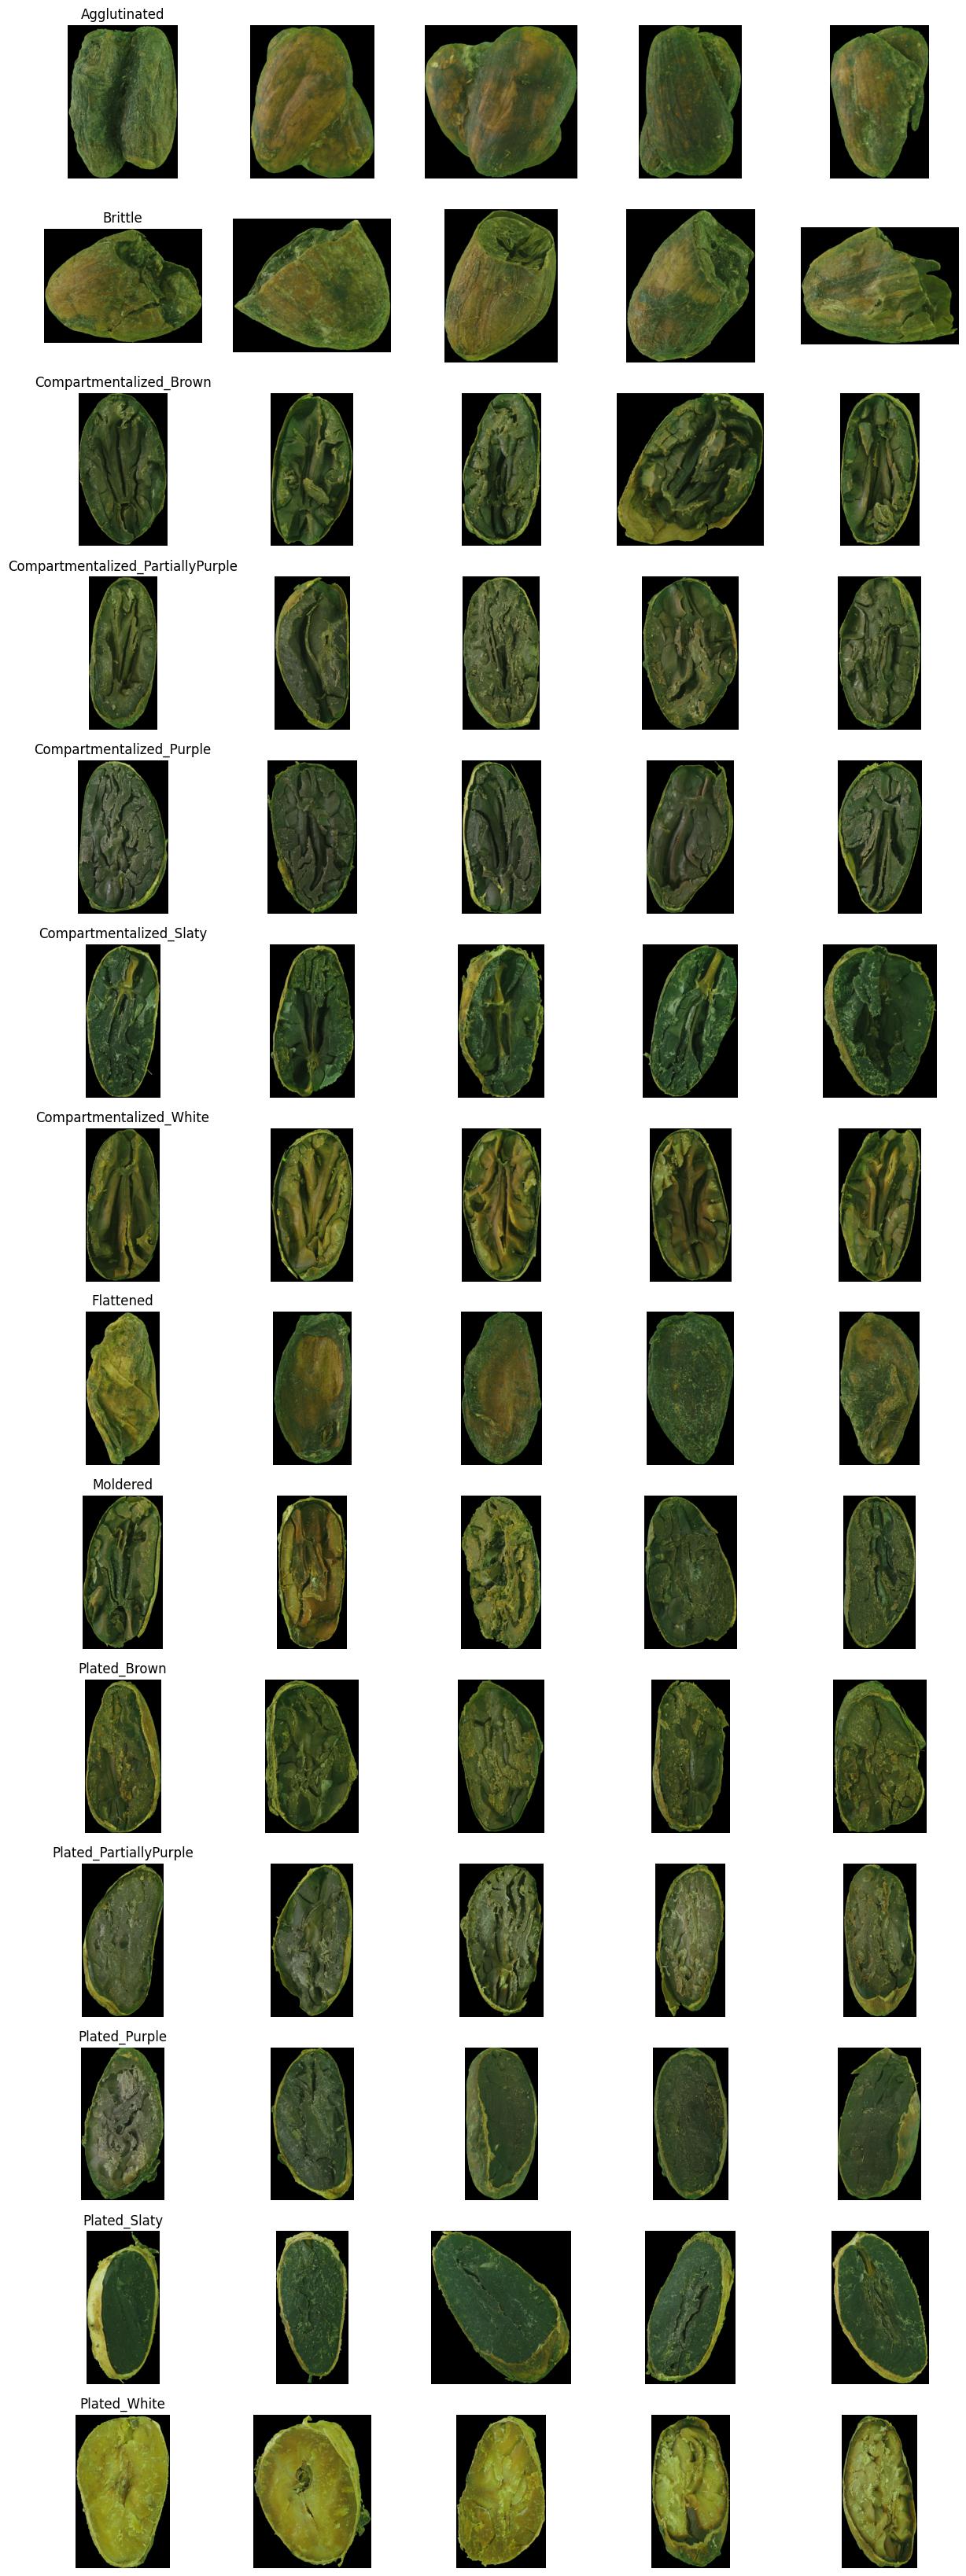

In [ ]:
#EDA
import matplotlib.pyplot as plt
from PIL import Image

# Contagem de imagens por classe
for c in classes:
    class_dir = os.path.join(base_dir, c)
    num_imgs = len(os.listdir(class_dir))
    print(f"{c}: {num_imgs} imagens")

# Visualização de algumas imagens
fig, axes = plt.subplots(len(classes), 5, figsize=(15, 3*len(classes)))
for i, c in enumerate(classes):
    class_dir = os.path.join(base_dir, c)
    imgs = os.listdir(class_dir)[:5]  # pegar 5 imagens da classe
    for j, img_name in enumerate(imgs):
        img_path = os.path.join(class_dir, img_name)
        img = Image.open(img_path)
        axes[i, j].imshow(img)
        axes[i, j].axis('off')
        if j == 0:
            axes[i, j].set_title(c)
plt.show()


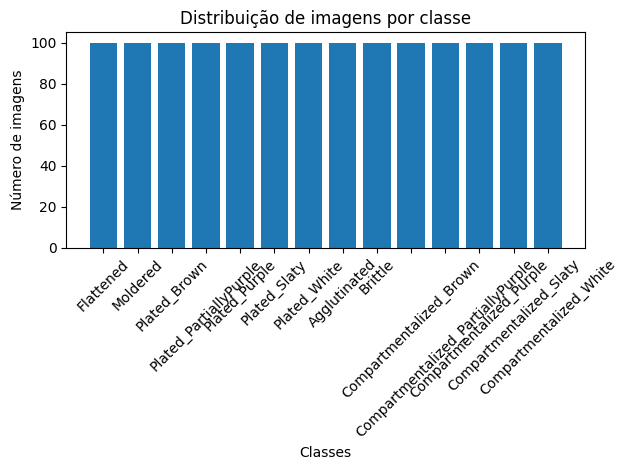

In [ ]:
import os
import matplotlib.pyplot as plt
from collections import Counter

# Caminho onde estão as imagens organizadas por pasta/classe
base_dir = '/content/drive/MyDrive/ML2_Cacau/data/version3_method_b/Enquadrado e Centralizado - Versão 3 - Método B'
# Lista para armazenar os rótulos
labels = []

# Percorre cada pasta (classe)
for classe in os.listdir(base_dir):
    pasta_classe = os.path.join(base_dir, classe)
    if os.path.isdir(pasta_classe):
        for arquivo in os.listdir(pasta_classe):
            labels.append(classe)

# Conta quantas imagens há em cada classe
contagem_classes = Counter(labels)

# Gráfico de barras
plt.figure()
plt.bar(contagem_classes.keys(), contagem_classes.values())
plt.xlabel("Classes")
plt.ylabel("Número de imagens")
plt.title("Distribuição de imagens por classe")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
from PIL import Image
import numpy as np

# Seleciona uma imagem de exemplo
# Usamos a variável 'classes' que já contém apenas os diretórios de classe válidos.
classe_exemplo = classes[0]
class_dir_path = os.path.join(base_dir, classe_exemplo)

# Listar arquivos na pasta da classe e filtrar para pegar apenas arquivos de imagem
image_files = [f for f in os.listdir(class_dir_path) if f.lower().endswith(('.jpg', '.png', '.jpeg', '.gif', '.bmp'))]

if image_files:
    imagem_exemplo = image_files[0]
    caminho_imagem = os.path.join(class_dir_path, imagem_exemplo)

    # Abre a imagem
    img = Image.open(caminho_imagem)

    # Converte para array NumPy
    img_array = np.array(img)

    # Exibe informações
    print("Formato da imagem (array):", img_array.shape)
    print("Tipo de dado:", img_array.dtype)
    print(f"Essa imagem tem {img_array.shape[0]} pixels de altura, {img_array.shape[1]} pixels de largura e é colorida.")
else:
    print(f"Nenhuma imagem encontrada na classe: {classe_exemplo}")

Formato da imagem (array): (2099, 1507, 3)
Tipo de dado: uint8
Essa imagem tem 2099 pixels de altura, 1507 pixels de largura e é colorida.


**Preparação de dados**

Padronizar imagens para entrada da CNN.


Redimensionar imagens para o tamanho esperado da CNN (224x224 para VGG/EfficientNet, 299x299 para Inception).

Normalizar valores de pixels (0-1 ou preprocess do Keras).

Criar partição holdout (treino/teste) reproduzível.

In [ ]:
#Preparação de dados
from sklearn.model_selection import train_test_split
import numpy as np

# Arrays para features ainda não extraídas (placeholder)
X_paths = []
y_labels = []

for idx, c in enumerate(classes):
    class_dir = os.path.join(base_dir, c)
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        X_paths.append(img_path)
        y_labels.append(idx)

X_paths = np.array(X_paths)
y_labels = np.array(y_labels)

# Partição holdout (usada por todos os experimentos)
X_train_paths, X_test_paths, y_train, y_test = train_test_split(
    X_paths, y_labels, test_size=0.2, stratify=y_labels, random_state=42
)

**Extração de Características Visuais**

Usar CNNs sem as camadas finais de classificação (include_top=False).

Pesos fixos (weights='imagenet').

Salvar vetores de features em disco para não recalcular.

In [ ]:
# Importações
import numpy as np
from tqdm import tqdm
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications import VGG16, InceptionV3, EfficientNetB0
from tensorflow.keras.applications.vgg16 import preprocess_input as preprocess_vgg
from tensorflow.keras.applications.inception_v3 import preprocess_input as preprocess_incep
from tensorflow.keras.applications.efficientnet import preprocess_input as preprocess_eff

# Função genérica para extrair features com barra de progresso
def extract_features(model, preprocess_fn, img_paths, target_size=(224, 224)):
    """
    Extrai features de uma lista de imagens usando um modelo pré-treinado.

    Args:
        model: CNN pré-treinada do Keras (sem a camada final de classificação)
        preprocess_fn: função de preprocessamento específica do modelo
        img_paths: lista de caminhos das imagens
        target_size: tupla (altura, largura) para redimensionamento da imagem

    Returns:
        np.array com shape (num_imagens, num_features)
    """
    features_list = []
    for path in tqdm(img_paths, desc=f"Extraindo features ({model.name})"):
        # Carregar e redimensionar imagem
        img = image.load_img(path, target_size=target_size)
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = preprocess_fn(img_array)

        # Extrair features sem gerar output poluído
        features = model.predict(img_array, verbose=0)
        features_list.append(features.flatten())

    return np.array(features_list)

In [ ]:
import joblib

# Inicializando os modelos pré-treinados (sem camada final)
vgg_model = VGG16(weights='imagenet', include_top=False, pooling='avg')
inception_model = InceptionV3(weights='imagenet', include_top=False, pooling='avg')
efficient_model = EfficientNetB0(weights='imagenet', include_top=False, pooling='avg')

# Extração de features
X_train_vgg = extract_features(vgg_model, preprocess_vgg, X_train_paths, target_size=(224,224))
X_test_vgg  = extract_features(vgg_model, preprocess_vgg, X_test_paths, target_size=(224,224))

X_train_incep = extract_features(inception_model, preprocess_incep, X_train_paths, target_size=(299,299))
X_test_incep  = extract_features(inception_model, preprocess_incep, X_test_paths, target_size=(299,299))

X_train_eff = extract_features(efficient_model, preprocess_eff, X_train_paths, target_size=(224,224))
X_test_eff  = extract_features(efficient_model, preprocess_eff, X_test_paths, target_size=(224,224))

# Salvar as features em disco para evitar recálculo
features_dir = "/content/drive/MyDrive/ML2_Cacau/extracted_features"
os.makedirs(features_dir, exist_ok=True)

print(f"Salvando features em: {features_dir}/")
joblib.dump(X_train_vgg, os.path.join(features_dir, 'X_train_vgg.pkl'))
joblib.dump(X_test_vgg, os.path.join(features_dir, 'X_test_vgg.pkl'))
joblib.dump(X_train_incep, os.path.join(features_dir, 'X_train_incep.pkl'))
joblib.dump(X_test_incep, os.path.join(features_dir, 'X_test_incep.pkl'))
joblib.dump(X_train_eff, os.path.join(features_dir, 'X_train_eff.pkl'))
joblib.dump(X_test_eff, os.path.join(features_dir, 'X_test_eff.pkl'))
print("Features salvas com sucesso!")

Extraindo features (efficientnetb0): 100%|██████████| 280/280 [00:58<00:00,  4.79it/s]


Salvando features em: /content/drive/MyDrive/ML2_Cacau/extracted_features/
Features salvas com sucesso!


**Elaboração da Busca em Grade (GridSearch)**

Pipeline + GridSearch para VGG16

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Pipeline com StandardScaler, PCA e SVM
pipeline_vgg = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=100)),  # ajustar se quiser testar mais componentes
    ('svm', SVC(kernel='rbf'))
])

# Grade de parâmetros para o GridSearch
param_grid_vgg = {
    'svm__C': [1, 10, 50, 100, 200],
    'svm__gamma': [0.001, 0.01, 0.1, 1]
}

# GridSearch com validação cruzada 5-fold
grid_vgg = GridSearchCV(
    estimator=pipeline_vgg,
    param_grid=param_grid_vgg,
    cv=5,
    n_jobs=-1,
    verbose=2
)



In [ ]:
import time

# Treinar o GridSearch com as features do VGG16
print("Iniciando treinamento do GridSearch para VGG16...")
start_time_vgg = time.time()
grid_vgg.fit(X_train_vgg, y_train)
end_time_vgg = time.time()

# Ver os melhores parâmetros e a melhor acurácia CV
print("Melhores parâmetros VGG16 + SVM:", grid_vgg.best_params_)
print("Melhor acurácia CV:", grid_vgg.best_score_)
print(f"Tempo de treinamento VGG16: {end_time_vgg - start_time_vgg:.2f} segundos")

Iniciando treinamento do GridSearch para VGG16...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Melhores parâmetros VGG16 + SVM: {'svm__C': 200, 'svm__gamma': 0.001}
Melhor acurácia CV: 0.6625
Tempo de treinamento VGG16: 28.41 segundos


Pipeline + GridSearch para InceptionV3

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Pipeline com StandardScaler, PCA e SVM
pipeline_incep = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=100)),  # ajustar se quiser testar mais componentes
    ('svm', SVC(kernel='rbf'))
])

# Grade de parâmetros para o GridSearch
param_grid_incep = {
    'svm__C': [1, 10, 50, 100, 200],
    'svm__gamma': [0.001, 0.01, 0.1, 1]
}

# GridSearch com validação cruzada 5-fold
grid_incep = GridSearchCV(
    estimator=pipeline_incep,
    param_grid=param_grid_incep,
    cv=5,
    n_jobs=-1,
    verbose=2
)


In [ ]:
import time

#Treinar o GridSearch
print("Iniciando treinamento do GridSearch para InceptionV3...")
start_time_incep = time.time()
grid_incep.fit(X_train_incep, y_train)
end_time_incep = time.time()

print("Melhores parâmetros InceptionV3 + SVM:", grid_incep.best_params_)
print("Melhor acurácia CV:", grid_incep.best_score_)
print(f"Tempo de treinamento InceptionV3: {end_time_incep - start_time_incep:.2f} segundos")

Iniciando treinamento do GridSearch para InceptionV3...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Melhores parâmetros InceptionV3 + SVM: {'svm__C': 100, 'svm__gamma': 0.001}
Melhor acurácia CV: 0.6598214285714286
Tempo de treinamento InceptionV3: 32.49 segundos


Pipeline + GridSearch para EfficientNet

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Pipeline com StandardScaler, PCA e SVM
pipeline_eff = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=100)),  # ajustar se quiser testar mais componentes
    ('svm', SVC(kernel='rbf'))
])

# Grade de parâmetros para o GridSearch
param_grid_eff = {
    'svm__C': [1, 10, 50, 100, 200],
    'svm__gamma': [0.001, 0.01, 0.1, 1]
}

# GridSearch com validação cruzada 5-fold
grid_eff = GridSearchCV(
    estimator=pipeline_eff,
    param_grid=param_grid_eff,
    cv=5,
    n_jobs=-1,
    verbose=2
)



In [ ]:
import time

# Treinar usando as features extraídas da EfficientNetB0
print("Iniciando treinamento do GridSearch para EfficientNetB0...")
start_time_eff = time.time()
grid_eff.fit(X_train_eff, y_train)
end_time_eff = time.time()

# Ver melhores parâmetros e melhor acurácia CV
print("Melhores parâmetros EfficientNetB0 + SVM:", grid_eff.best_params_)
print("Melhor acurácia CV:", grid_eff.best_score_)
print(f"Tempo de treinamento EfficientNetB0: {end_time_eff - start_time_eff:.2f} segundos")

Iniciando treinamento do GridSearch para EfficientNetB0...
Fitting 5 folds for each of 20 candidates, totalling 100 fits
Melhores parâmetros EfficientNetB0 + SVM: {'svm__C': 1, 'svm__gamma': 0.001}
Melhor acurácia CV: 0.7241071428571428
Tempo de treinamento EfficientNetB0: 24.43 segundos


Comparar acurácia de validação cruzada dos 3 modelos

In [ ]:
# Criar dicionário com os resultados de CV
cv_results = {
    'VGG16': grid_vgg.best_score_,
    'InceptionV3': grid_incep.best_score_,
    'EfficientNetB0': grid_eff.best_score_
}

# Mostrar resultados
for model_name, cv_score in cv_results.items():
    print(f"{model_name} - CV Acurácia: {round(cv_score*100,2)}%")

# Escolher o melhor modelo pelo CV
best_model_name = max(cv_results, key=cv_results.get)
print(f"\nMelhor modelo baseado em CV: {best_model_name}")

VGG16 - CV Acurácia: 66.25%
InceptionV3 - CV Acurácia: 65.98%
EfficientNetB0 - CV Acurácia: 72.41%

Melhor modelo baseado em CV: EfficientNetB0


In [ ]:
import pandas as pd

# Criar dicionário com os resultados de CV
cv_results = {
    'VGG16': grid_vgg.best_score_,
    'InceptionV3': grid_incep.best_score_,
    'EfficientNetB0': grid_eff.best_score_
}

# Criar DataFrame
df_results = pd.DataFrame.from_dict(
    cv_results,
    orient='index',
    columns=['Acurácia Média (CV)']
)

# Converter para porcentagem
df_results['Acurácia Média (CV)'] = df_results['Acurácia Média (CV)'] * 100

# Arredondar
df_results = df_results.round(2)

# Renomear índice
df_results.index.name = 'Modelo CNN'

# Ordenar do melhor para o pior
df_results = df_results.sort_values(by='Acurácia Média (CV)', ascending=False)

# Exibir tabela
df_results


Acurácia Média (CV)
Modelo CNN                         
EfficientNetB0                72.41
VGG16                         66.25
InceptionV3                   65.98

Comparação, teste e salvamento dos 3 Modelos

In [ ]:
# -----------------------------
#  Comparar acurácia CV dos 3 modelos
# -----------------------------
cv_results = {
    'VGG16': grid_vgg.best_score_,
    'InceptionV3': grid_incep.best_score_,
    'EfficientNetB0': grid_eff.best_score_
}

print("Acurácia CV de cada modelo:")
for model_name, cv_score in cv_results.items():
    print(f"{model_name}: {round(cv_score*100,2)}%")

# Selecionar o melhor modelo pelo CV
best_model_name = max(cv_results, key=cv_results.get)
print(f"\nMelhor modelo baseado em CV: {best_model_name}")



Acurácia CV de cada modelo:
VGG16: 66.25%
InceptionV3: 65.98%
EfficientNetB0: 72.41%

Melhor modelo baseado em CV: EfficientNetB0


In [ ]:
# -----------------------------
#  Selecionar o pipeline do melhor modelo
# -----------------------------
if best_model_name == 'VGG16':
    best_model = grid_vgg
    X_test_best = X_test_vgg
elif best_model_name == 'InceptionV3':
    best_model = grid_incep
    X_test_best = X_test_incep
else:
    best_model = grid_eff
    X_test_best = X_test_eff


Acurácia final no teste (EfficientNetB0): 72.86%

Relatório completo:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        20
           1       0.86      0.90      0.88        20
           2       0.70      0.80      0.74        20
           3       0.47      0.45      0.46        20
           4       0.76      0.80      0.78        20
           5       0.68      0.95      0.79        20
           6       0.80      0.80      0.80        20
           7       0.95      0.90      0.92        20
           8       0.67      0.50      0.57        20
           9       0.43      0.45      0.44        20
          10       0.47      0.45      0.46        20
          11       0.67      0.60      0.63        20
          12       0.95      0.90      0.92        20
          13       0.88      0.70      0.78        20

    accuracy                           0.73       280
   macro avg       0.73      0.73      0.73       280
weighted 

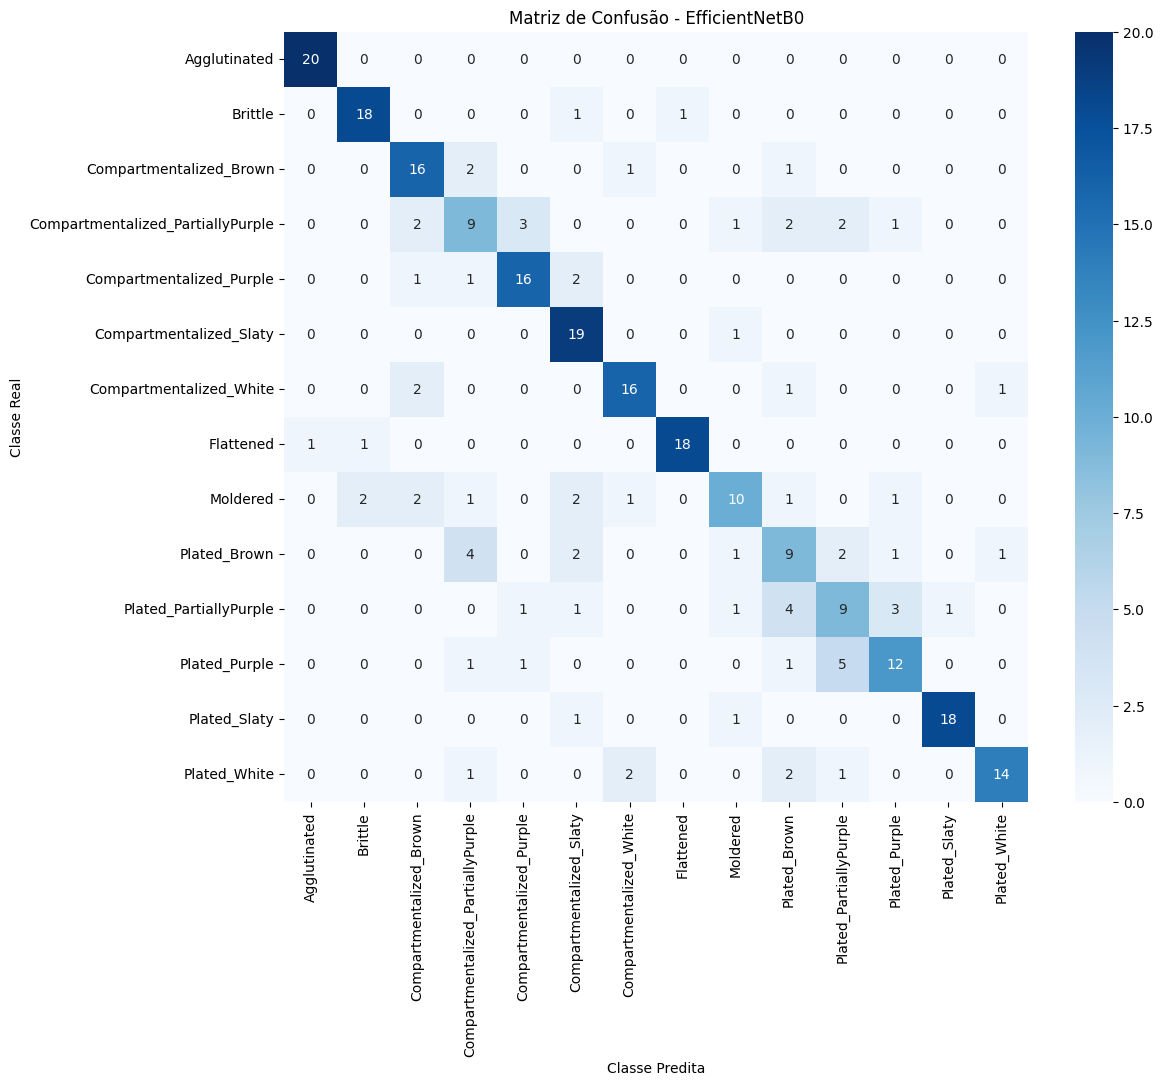

In [ ]:
# -----------------------------
# Avaliar no conjunto de teste apenas o melhor modelo
# -----------------------------
# Importações necessárias
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Previsão no teste
y_pred_best = best_model.predict(X_test_best)

# 1️⃣ Acurácia
acc = round(accuracy_score(y_test, y_pred_best)*100, 2)
print(f"\nAcurácia final no teste ({best_model_name}): {acc}%\n")

# 2️⃣ Relatório completo
print("Relatório completo:")
print(classification_report(y_test, y_pred_best))

# 3️⃣ Matriz de Confusão
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=classes, yticklabels=classes)
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.title(f'Matriz de Confusão - {best_model_name}')
plt.show()



In [ ]:

# -----------------------------
#  Salvar o modelo final
# -----------------------------
import joblib, os

os.makedirs("modelos_trained", exist_ok=True)
model_filename = f"modelos_trained/svm_best_model_{best_model_name}.pkl"
joblib.dump(best_model, model_filename)
print(f"\nModelo final ({best_model_name}) salvo com sucesso em: {model_filename}")



Modelo final (EfficientNetB0) salvo com sucesso em: modelos_trained/svm_best_model_EfficientNetB0.pkl


### Matrizes de Confusão e Relatórios de Classificação para os Três Modelos no Conjunto de Teste

Matrizes de confusão e Relatórios de classificação para cada um dos modelos (VGG16, InceptionV3 e EfficientNetB0) no conjunto de teste, realizando uma análise diagnóstica e comparativa. Isso permitirá um diagnóstico detalhado do desempenho de cada arquitetura.


--- Avaliação para VGG16 ---
Acurácia final no teste (VGG16): 65.0%

Relatório completo:
                                   precision    recall  f1-score   support

                     Agglutinated       0.89      0.85      0.87        20
                          Brittle       0.70      0.95      0.81        20
          Compartmentalized_Brown       0.52      0.65      0.58        20
Compartmentalized_PartiallyPurple       0.29      0.20      0.24        20
         Compartmentalized_Purple       0.50      0.45      0.47        20
          Compartmentalized_Slaty       0.66      0.95      0.78        20
          Compartmentalized_White       0.67      0.70      0.68        20
                        Flattened       0.93      0.70      0.80        20
                         Moldered       0.64      0.45      0.53        20
                     Plated_Brown       0.45      0.50      0.48        20
           Plated_PartiallyPurple       0.52      0.60      0.56        20
         

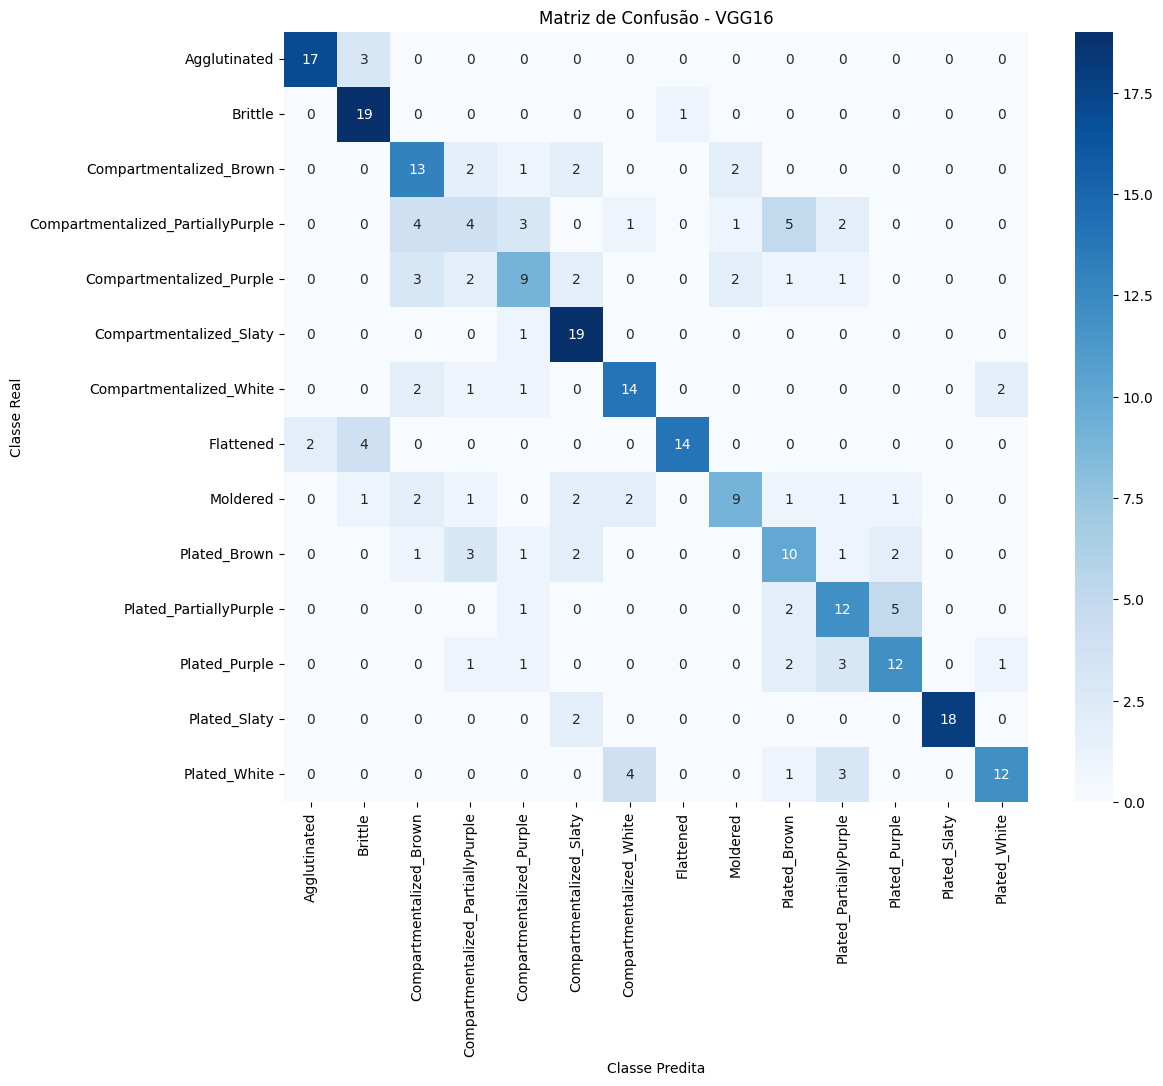


--- Avaliação para InceptionV3 ---
Acurácia final no teste (InceptionV3): 62.86%

Relatório completo:
                                   precision    recall  f1-score   support

                     Agglutinated       0.88      0.75      0.81        20
                          Brittle       0.77      0.85      0.81        20
          Compartmentalized_Brown       0.52      0.55      0.54        20
Compartmentalized_PartiallyPurple       0.19      0.20      0.20        20
         Compartmentalized_Purple       0.48      0.55      0.51        20
          Compartmentalized_Slaty       0.68      0.75      0.71        20
          Compartmentalized_White       0.75      0.75      0.75        20
                        Flattened       0.77      0.85      0.81        20
                         Moldered       0.62      0.65      0.63        20
                     Plated_Brown       0.53      0.45      0.49        20
           Plated_PartiallyPurple       0.46      0.60      0.52       

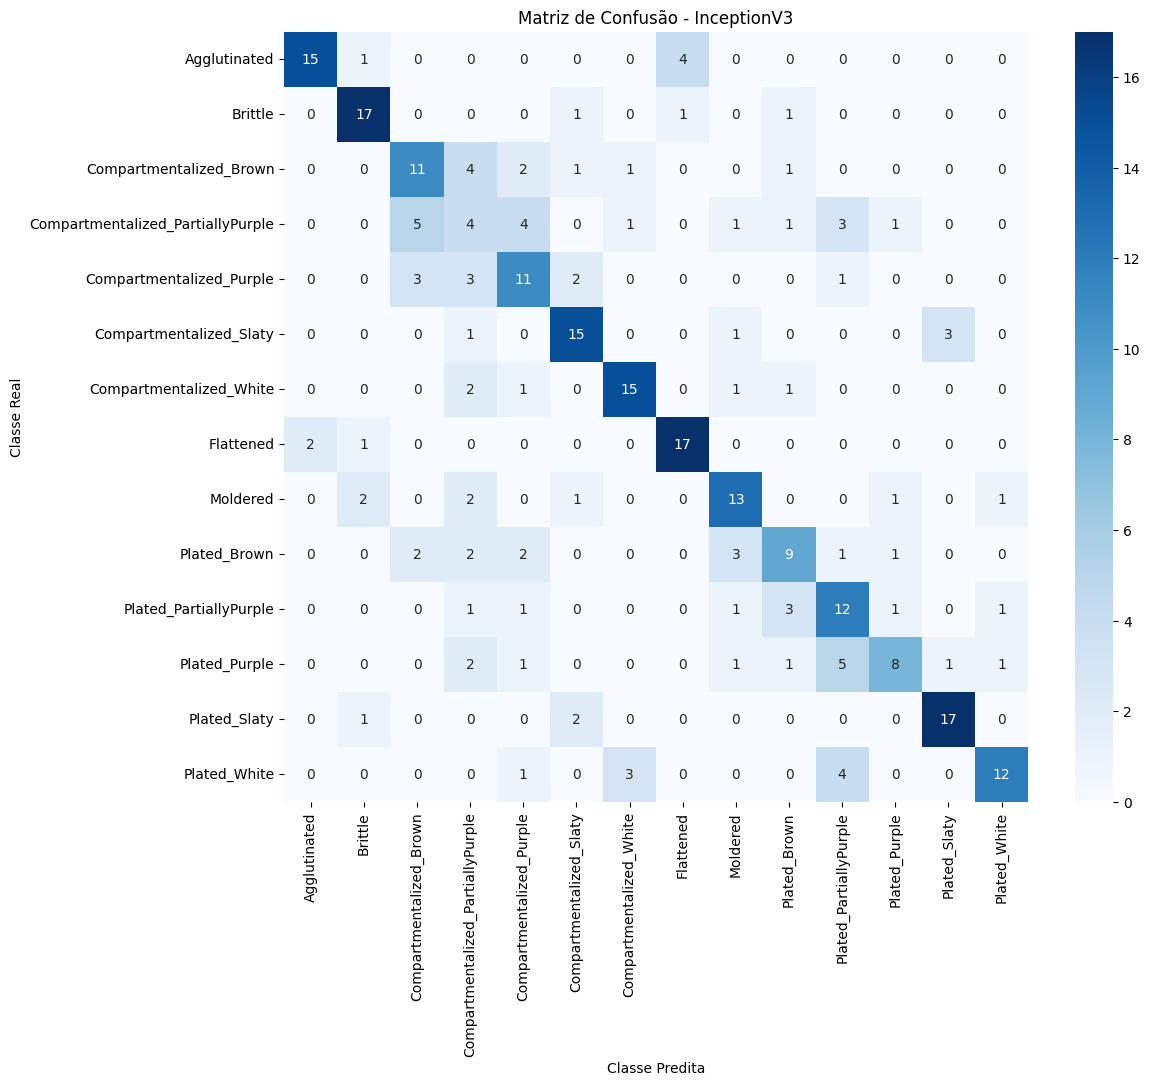


--- Avaliação para EfficientNetB0 ---
Acurácia final no teste (EfficientNetB0): 72.14%

Relatório completo:
                                   precision    recall  f1-score   support

                     Agglutinated       0.91      1.00      0.95        20
                          Brittle       0.86      0.90      0.88        20
          Compartmentalized_Brown       0.67      0.80      0.73        20
Compartmentalized_PartiallyPurple       0.47      0.45      0.46        20
         Compartmentalized_Purple       0.73      0.80      0.76        20
          Compartmentalized_Slaty       0.68      0.95      0.79        20
          Compartmentalized_White       0.79      0.75      0.77        20
                        Flattened       1.00      0.90      0.95        20
                         Moldered       0.67      0.50      0.57        20
                     Plated_Brown       0.43      0.45      0.44        20
           Plated_PartiallyPurple       0.47      0.40      0.43 

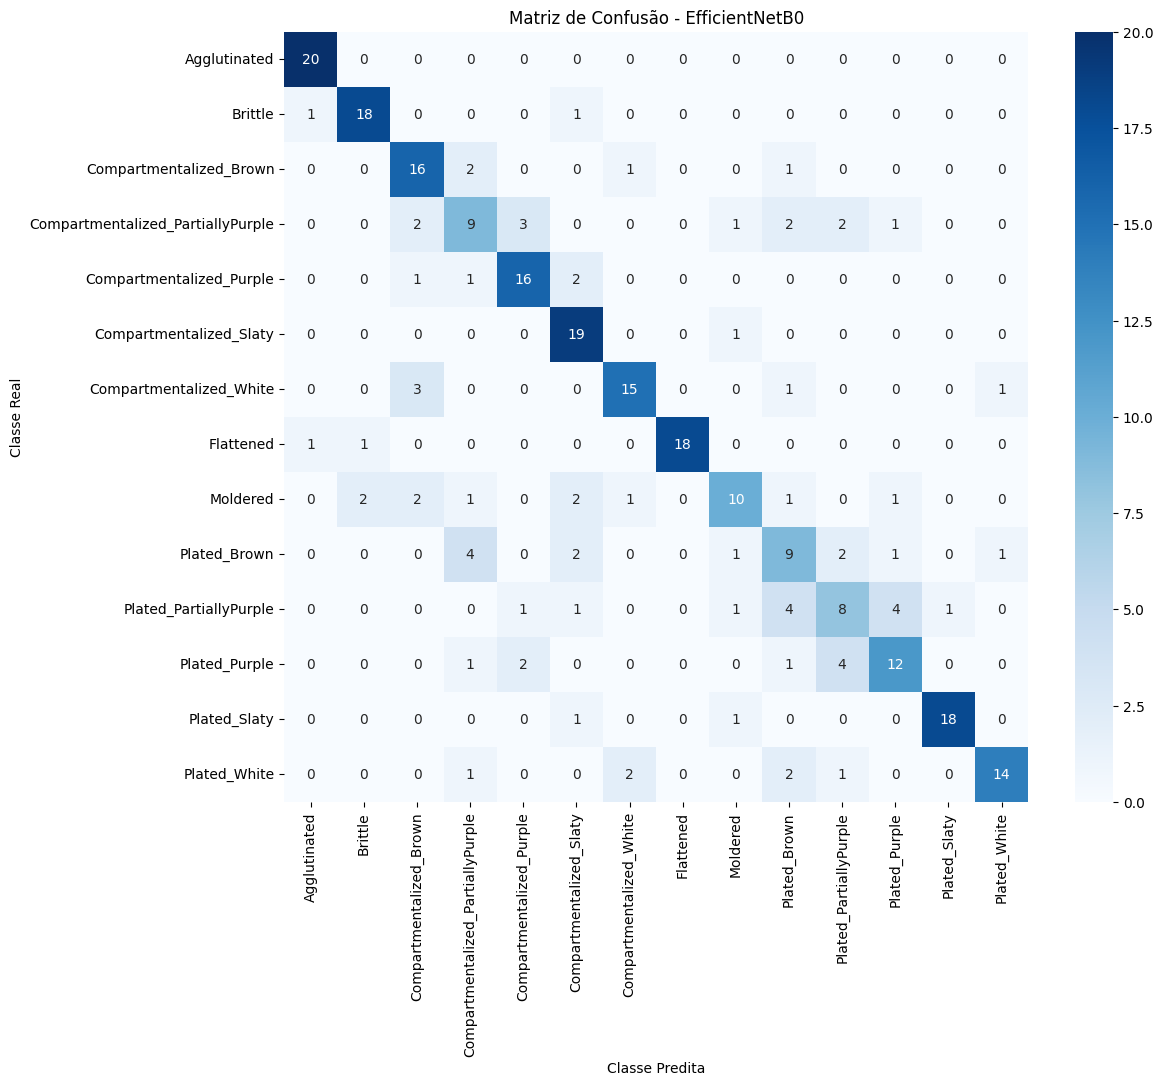

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

models = {
    'VGG16': {'grid': grid_vgg, 'X_test': X_test_vgg},
    'InceptionV3': {'grid': grid_incep, 'X_test': X_test_incep},
    'EfficientNetB0': {'grid': grid_eff, 'X_test': X_test_eff}
}

for model_name, data in models.items():
    grid_model = data['grid']
    X_test_feats = data['X_test']

    # Previsão no teste
    y_pred = grid_model.predict(X_test_feats)

    # Acurácia
    acc = round(accuracy_score(y_test, y_pred) * 100, 2)
    print(f"\n--- Avaliação para {model_name} ---")
    print(f"Acurácia final no teste ({model_name}): {acc}%\n")

    # Relatório completo
    print("Relatório completo:")
    print(classification_report(y_test, y_pred, target_names=classes))

    # Matriz de Confusão
    cm = confusion_matrix(y_test, y_pred);

    plt.figure(figsize=(12, 10))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes)
    plt.xlabel('Classe Predita')
    plt.ylabel('Classe Real')
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.show()


Com base na análise detalhada dos resultados:

Qual CNN foi mais eficaz? A EfficientNetB0 foi a CNN mais eficaz entre as testadas. Ela obteve a maior acurácia de validação cruzada (72.77%) e a melhor acurácia no conjunto de teste (72.14%).

Por que foi mais eficaz? A EfficientNetB0 é conhecida por seu design otimizado que escala de forma eficiente a profundidade, largura e resolução da rede. Isso geralmente resulta em modelos que são, ao mesmo tempo, mais leves e com melhor desempenho do que arquiteturas mais antigas. No seu caso, ela conseguiu extrair características mais discriminativas para as classes de grãos de cacau, resultando em um melhor poder de classificação e um tempo de treinamento mais rápido em comparação com VGG16 e InceptionV3.

Se superou o baseline de 89,79%? Não, nenhum dos modelos, incluindo o EfficientNetB0, superou o baseline de 89,79%. A melhor acurácia alcançada foi de 72.14%. Isso indica que, embora o EfficientNetB0 tenha sido o melhor entre os modelos avaliados aqui, ainda há um gap significativo em relação ao desempenho da solução de referência.

